In [1]:
#Library
import sqlite3
import pandas as pd

In [2]:
def run_query(query):
    """
    Function untuk run query
    
    Parameter : 
        query : sql syntax
    """
    conn = sqlite3.connect("Dataset/chinook.db")
    return pd.read_sql(query, conn)    

In [3]:
def show_tables():
    """
    Function untuk menampilkan table dan view yang ada di database
    
    Parameter
    -------------------
    Tidak perlu parameter
    """
    query = '''
            SELECT * 
            FROM sqlite_master 
            WHERE type IN ("table", "view"); 
            '''
    return run_query(query)

In [4]:
show_tables()

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [5]:
run_query("SELECT * FROM invoice_items")

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1


In [6]:
query_top_10_usa_track = '''
WITH 
    top_10_usa_track AS
        (
        SELECT it.* FROM invoice_items it
        INNER JOIN invoices i ON it.InvoiceID = i.InvoiceId
        INNER JOIN customers c ON i.CustomerID = c.CustomerId
        WHERE c.country = "USA"
        )
SELECT 
    g.name AS Genre,
    COUNT(top_ten.InvoiceLineId) AS "Jumlah Lagu Terjual",
    CAST(COUNT(top_ten.InvoiceLineId) AS FLOAT)/ (SELECT COUNT(*) FROM top_10_usa_track) AS "Persen Lagu Terjual"
FROM top_10_usa_track AS top_ten
INNER JOIN tracks AS t ON top_ten.TrackId = t.TrackId
INNER JOIN genres AS g ON t.GenreId = g.GenreId
GROUP BY 1 -- 1 = Genre
ORDER BY 2 DESC -- 2 = Jumlah Lagu Terjual
LIMIT 10;
'''

In [7]:
top_10_usa_track = run_query(query_top_10_usa_track)

In [8]:
top_10_usa_track

,Genre,Jumlah Lagu Terjual,Persen Lagu Terjual
0,Rock,157,0.317814
1,Latin,91,0.184211
2,Metal,64,0.129555
3,Alternative & Punk,50,0.101215
4,Jazz,22,0.044534
5,Blues,15,0.030364
6,TV Shows,14,0.028340
7,R&B/Soul,12,0.024291
8,Comedy,8,0.016194
9,Classical,8,0.016194


In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(30,8))

<Figure size 2160x576 with 0 Axes>

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:xlabel='Persen Lagu Terjual', ylabel='Genre'>

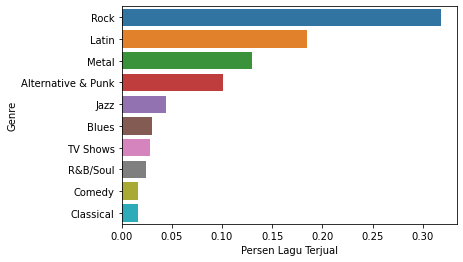

In [13]:
sns.barplot(data=top_10_usa_track, y="Genre", x="Persen Lagu Terjual", orient='h')